In [1]:
#import data by kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d msambare/fer2013

 86% 52.0M/60.3M [00:00<00:00, 281MB/s]
100% 60.3M/60.3M [00:00<00:00, 278MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fer2013.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#mport required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [15]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        '/content/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        '/content/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [16]:
# create model structure
emotion_model = Sequential()

In [17]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [18]:
emotion_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [19]:
cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
# Train the neural network/model
history=emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


448/448 [==============================] - 16s 35ms/step - loss: 1.8003 - accuracy: 0.2619 - val_loss: 1.7016 - val_accuracy: 0.3510
Epoch 2/50
448/448 [==============================] - 12s 27ms/step - loss: 1.6300 - accuracy: 0.3647 - val_loss: 1.5439 - val_accuracy: 0.4159
Epoch 3/50
448/448 [==============================] - 12s 28ms/step - loss: 1.5359 - accuracy: 0.4106 - val_loss: 1.4761 - val_accuracy: 0.4428
Epoch 4/50
448/448 [==============================] - 12s 27ms/step - loss: 1.4630 - accuracy: 0.4402 - val_loss: 1.4091 - val_accuracy: 0.4625
Epoch 5/50
448/448 [==============================] - 12s 27ms/step - loss: 1.4032 - accuracy: 0.4695 - val_loss: 1.3561 - val_accuracy: 0.4838
Epoch 6/50
448/448 [==============================] - 12s 28ms/step - loss: 1.3562 - accuracy: 0.4854 - val_loss: 1.3306 - val_accuracy: 0.4929
Epoch 7/50
448/448 [==============================] - 13s 29ms/step - loss: 1.3116 - accuracy: 0.5001 - val_loss: 1.2839 - val_accuracy: 0.5092
Epo

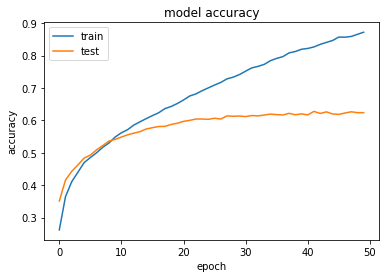

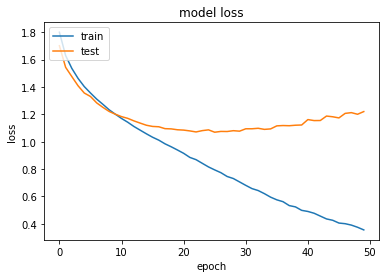

{'loss': [1.800279974937439,
  1.6299959421157837,
  1.5358744859695435,
  1.4629586935043335,
  1.4032083749771118,
  1.3562184572219849,
  1.3116481304168701,
  1.2734047174453735,
  1.2335611581802368,
  1.201168179512024,
  1.169991374015808,
  1.142486810684204,
  1.1112184524536133,
  1.0844842195510864,
  1.0579167604446411,
  1.0327519178390503,
  1.0114707946777344,
  0.9846000671386719,
  0.9629617929458618,
  0.9395498037338257,
  0.9152107238769531,
  0.8853062987327576,
  0.8687383532524109,
  0.8421314358711243,
  0.8157719373703003,
  0.793949544429779,
  0.7735657691955566,
  0.7458992600440979,
  0.7309150695800781,
  0.706059455871582,
  0.6810535192489624,
  0.6573508977890015,
  0.6430822014808655,
  0.6204205751419067,
  0.5947590470314026,
  0.5752395391464233,
  0.561630368232727,
  0.5331177711486816,
  0.5236820578575134,
  0.49836045503616333,
  0.49025648832321167,
  0.4771895110607147,
  0.45641234517097473,
  0.4356524646282196,
  0.42571285367012024,
  0.4

In [21]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history

In [22]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("/content/emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('/content/emotion_model.h5')